In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import warnings
import cv2
import numpy as np
from sklearn.cluster import KMeans
from os import listdir
from os.path import isfile, join
warnings.filterwarnings(action='default')

In [ ]:


def load_images_from_folder(folder):
    images = []
    for filename in listdir(folder):
        img = cv2.imread(join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Initialize SIFT feature extractor
sift = cv2.SIFT_create()

# List to store features of all images
descriptors_list = []

# Load images from each folder and extract features
base = "/content/drive/MyDrive/2023_2/Caltech_101/101_ObjectCategories/"
folders = [base + 'tick',base +  'trilobite',base +  'umbrella',base +  'watch',base +  'water_lilly', base + 'wheelchair', base + 'wild_cat',base +  'windsor_chair', base + 'wrench', base + 'yin_yang']
for folder in folders:
    images = load_images_from_folder(folder)
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        if descriptors is not None:
            descriptors_list.append(descriptors)

# Convert all features into one numpy array
all_descriptors = np.vstack(descriptors_list)

# Create visual vocabulary with K-means clustering
k = 100  # Number of clusters, vocabulary size
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(all_descriptors)

# Generate word bag histogram for each image
bow_histograms = []
for descriptors in descriptors_list:
    histogram = np.zeros(k)
    cluster_assignments = kmeans.predict(descriptors)
    for assignment in cluster_assignments:
        histogram[assignment] += 1
    bow_histograms.append(histogram)

# bow_histograms now contains a wordbag histogram for each image.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

# Print vocabulary size
print("Vocabulary Size:", k)

Vocabulary Size: 100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


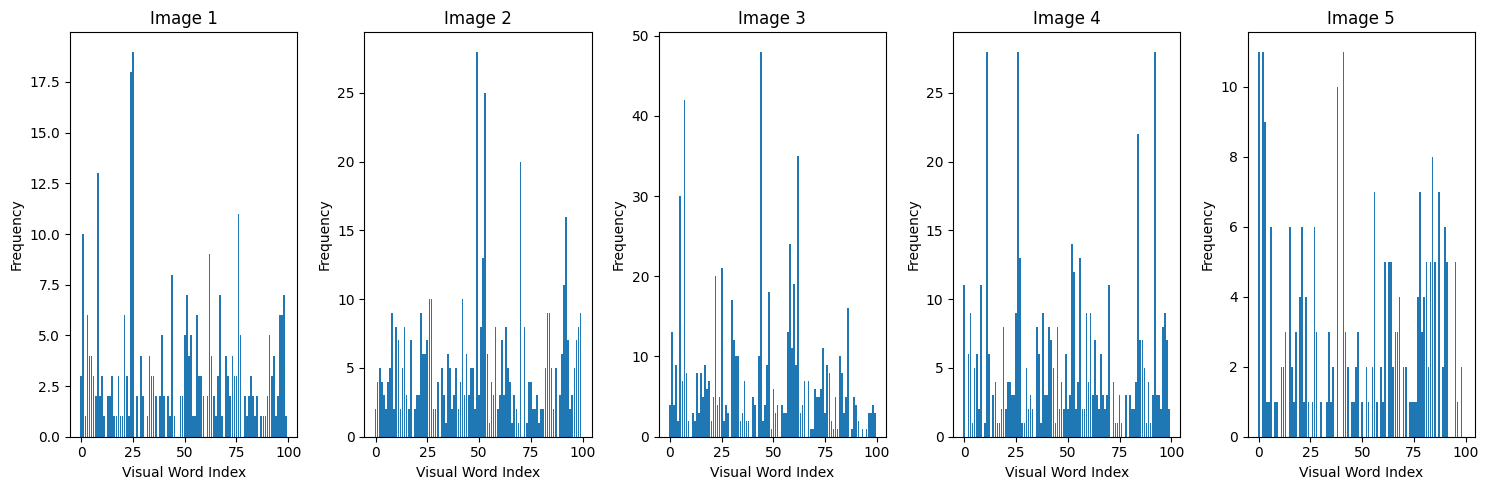

In [ ]:
# Word bag histogram visualization (first 5 images)
plt.figure(figsize=(15, 5))
for i, histogram in enumerate(bow_histograms[:5]):
    plt.subplot(1, 5, i + 1)
    plt.bar(range(k), histogram)
    plt.title(f'Image {i+1}')
    plt.xlabel('Visual Word Index')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


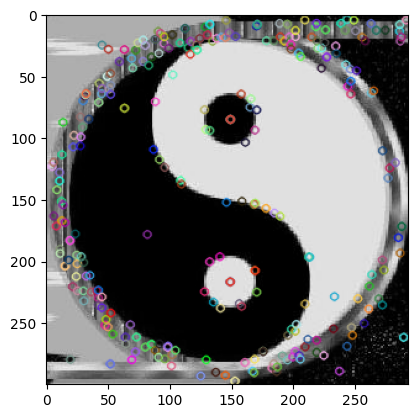

In [ ]:
# vector quantisation process.
example_image = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
keypoints, descriptors = sift.detectAndCompute(example_image, None)
plt.imshow(cv2.drawKeypoints(example_image, keypoints, None))



# 2

In [ ]:
import os

def load_images_and_labels(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
# Use folder name as label
            label = folder.split('/')[-1]
            labels.append(label)
    return images, labels

# Initialize SIFT feature extractor
sift = cv2.SIFT_create()


# Load images from each folder and extract features and labels
base = "/content/drive/MyDrive/2023_2/Caltech_101/101_ObjectCategories/"
folders = ['tick', 'trilobite', 'umbrella', 'watch', 'water_lilly', 'wheelchair', 'wild_cat', 'windsor_chair', 'wrench', 'yin_yang']


labels = []
for folder_name in folders:
    label = folder_name.split('/')[-1]
# Add labels as many as the number of images in each folder
    num_images = len(load_images_from_folder(os.path.join(base, folder_name)))
    labels.extend([label] * num_images)
# Modify all_labels to have a length equal to the number of images
all_labels = np.array(labels)




In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import time

# Separate the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(bow_histograms, all_labels, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, # 트리의 수
                            max_depth=None, # 트리의 최대 깊이
                            random_state=0)

# Measure training start time
start_time = time.time()
rf.fit(X_train, y_train) # Learn with training dataset
end_time = time.time()

# Training time output
print(f"Training took {end_time - start_time:.2f} seconds.")

# Performance evaluation with test dataset
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)  # Accuracy calculation
conf_matrix = confusion_matrix(y_test, predictions)  # Create confusion matrix

# Output results
print("Recognition Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Measure test start time
start_time = time.time()
predictions = rf.predict(X_test)  # Prediction with test dataset
end_time = time.time()
# Test time output
print(f"Testing took {end_time - start_time:.2f} seconds.")

# Example success/failure case output (first 10 results)
for i in range(10):
    print(f"Image {i+1} - Actual: {y_test[i]}, Predicted: {predictions[i]}")

# Evaluate the impact of vocabulary size on classification accuracy
# For this, you can retrain the model with different vocabulary sizes and measure the accuracy.


Training took 0.26 seconds.
Recognition Accuracy: 0.6869565217391305
Confusion Matrix:
 [[ 5  1  0  0  0  1  1  0  0  0]
 [ 0 15  1  2  0  3  0  0  0  0]
 [ 0  0  8  0  0  2  0  0  3  3]
 [ 0  2  3 14  0  0  0  0  0  0]
 [ 0  1  0  0  4  1  0  0  0  0]
 [ 0  0  0  2  0  7  0  1  0  0]
 [ 0  2  0  1  1  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  1  0  0  0  0  0  5  0]
 [ 0  1  2  0  0  0  0  0  0 14]]
Testing took 0.01 seconds.
Image 1 - Actual: wrench, Predicted: wrench
Image 2 - Actual: trilobite, Predicted: trilobite
Image 3 - Actual: umbrella, Predicted: umbrella
Image 4 - Actual: yin_yang, Predicted: yin_yang
Image 5 - Actual: yin_yang, Predicted: yin_yang
Image 6 - Actual: water_lilly, Predicted: water_lilly
Image 7 - Actual: umbrella, Predicted: yin_yang
Image 8 - Actual: tick, Predicted: tick
Image 9 - Actual: trilobite, Predicted: trilobite
Image 10 - Actual: water_lilly, Predicted: wheelchair


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
     return images

 def load_images_and_labels(folders):
   images = []
     labels = []
     for folder in folders:
         # Load images and assign labels to each folder
         folder_images = load_images_from_folder(folder)
         folder_label = os.path.basename(folder) # Use folder name as label
         images.extend(folder_images)
         labels.extend([folder_label] * len(folder_images))
     return images, labels

# Define the folder path
  base = "/content/drive/MyDrive/2023_2/Caltech_101/101_ObjectCategories/"
 folder_names = ['tick', 'trilobite', 'umbrella', 'watch', 'water_lilly', 'wheelchair', 'wild_cat', 'windsor_chair', 'wrench', 'yin_yang']
 folders = [os.path.join(base, folder_name) for folder_name in folder_names]

# Load images and labels
 images, labels = load_images_and_labels(folders)


# 3

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Function to separate the dataset into training and testing
def split_dataset(images, labels, train_size_per_class):
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []
    for class_label in np.unique(labels):
        class_images = [img for img, label in zip(images, labels) if label == class_label]
        train_images.extend(class_images[:train_size_per_class])
        train_labels.extend([class_label] * train_size_per_class)
        test_images.extend(class_images[train_size_per_class:train_size_per_class*2])
        test_labels.extend([class_label] * train_size_per_class)
    return train_images, train_labels, test_images, test_labels

# Image preprocessing functions (size normalization and pixel value centroiding)
def preprocess_images(images, size=(128, 128)):
    processed_images = []
    for img in images:
        img = cv2.resize(img, size)  # change size
        img = img.astype('float32')  # Change data type
        img -= np.mean(img, axis=0)  # Adjust pixel value center
        processed_images.append(img)
    return processed_images



# Image preprocessing
images = preprocess_images(images)

# Separate training and test data
train_images, train_labels, test_images, test_labels = split_dataset(images, labels, 15)


sift = cv2.SIFT_create()


def extract_sift_descriptors_and_labels(images, labels):
    descriptors = []
    descriptor_labels = []
    for img, label in zip(images, labels):
# Check if the image is not empty
        if img is not None:
# Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Convert image to uint8 type
            gray = np.uint8(gray)
# Extract SIFT descriptor
            kp, desc = sift.detectAndCompute(gray, None)
# Add only if descriptor exists
            if desc is not None:
                descriptors.append(desc)
# Add a label for the descriptor
                descriptor_labels.extend([label] * desc.shape[0])
    return descriptors, descriptor_labels

# SIFT descriptor and label extraction
train_descriptors, train_descriptor_labels = extract_sift_descriptors_and_labels(train_images, train_labels)
test_descriptors, test_descriptor_labels = extract_sift_descriptors_and_labels(test_images, test_labels)


# Combine all training descriptors into one array
train_descriptors = np.vstack(train_descriptors)




In [ ]:
# Learn the RF codebook using labels from the descriptor
rf_codebook = RandomForestClassifier(n_estimators=100, random_state=0)
rf_codebook.fit(train_descriptors, train_descriptor_labels)

# Generate bag of words histogram using leaf indices of training data
train_leaf_indices = rf_codebook.apply(train_descriptors)
train_bow_histograms = np.array([np.bincount(leaf_indices, minlength=rf_codebook.n_estimators) for leaf_indices in train_leaf_indices])

# Do the same for test data
test_descriptors = np.vstack(test_descriptors)
test_leaf_indices = rf_codebook.apply(test_descriptors)
test_bow_histograms = np.array([np.bincount(leaf_indices, minlength=rf_codebook.n_estimators) for leaf_indices in test_leaf_indices])

# Train an RF classifier and evaluate it on test data
rf_classifier = RandomForestClassifier

In [ ]:
# print("Each row in train_leaf_indices has equal length:", all(len(row) == len(train_leaf_indices[0]) for row in train_leaf_indices))

# max_leaf_index = np.max(train_leaf_indices)
# print("Max leaf index:", max_leaf_index)


Each row in train_leaf_indices has equal length: True
Max leaf index: 13192


In [ ]:
train_bow_histograms = np.array([np.bincount(leaf_indices, minlength=max_leaf_index + 1) for leaf_indices in train_leaf_indices])
test_bow_histograms = np.array([np.bincount(leaf_indices, minlength=max_leaf_index + 1) for leaf_indices in test_leaf_indices])

# Adjust training and testing labels to the number of images
train_labels = np.repeat(train_labels, len(train_bow_histograms) // len(train_labels))
test_labels = np.repeat(test_labels, len(test_bow_histograms) // len(test_labels))


In [ ]:
# Adjust labels to match the leaf index length of training and test data
 train_labels_expanded = []
 test_labels_expanded = []
 for leaf_indices, label in zip(train_leaf_indices, train_labels):
     train_labels_expanded.extend([label] * len(leaf_indices))

 for leaf_indices, label in zip(test_leaf_indices, test_labels):
     test_labels_expanded.extend([label] * len(leaf_indices))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import time

# Random Forest classifier initialization and training
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)

# Measure training start time
start_train_time = time.time()
rf_classifier.fit(train_bow_histograms, train_labels)
# Measure training end time
end_train_time = time.time()

# Training time output
print(f"Training Time: {end_train_time - start_train_time:.2f} seconds")

# Evaluate on test data
start_test_time = time.time()
test_predictions = rf_classifier.predict(test_bow_histograms)
end_test_time = time.time()
# Test time output
print(f"Testing Time: {end_test_time - start_test_time:.2f} seconds")

# Performance evaluation
accuracy = accuracy_score(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)
# Output results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)



# 4